In [6]:
import pandas as pd
import numpy as np
import functions

%matplotlib inline
import matplotlib.pyplot as plt

import datetime as dt
import time

from scipy.stats import chi2_contingency, ttest_ind ,chisquare, kruskal, pearsonr

In [7]:
def dateparse(time_in_secs):
    return pd.to_datetime(time_in_secs, unit='s')
    

In [15]:
dataset = pd.read_csv('steam_reviews.csv', header='infer',
    parse_dates=['timestamp_created',
    'timestamp_updated', 'author.last_played'],
    date_parser=dateparse)

In [69]:
dataset.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49


<AxesSubplot:>

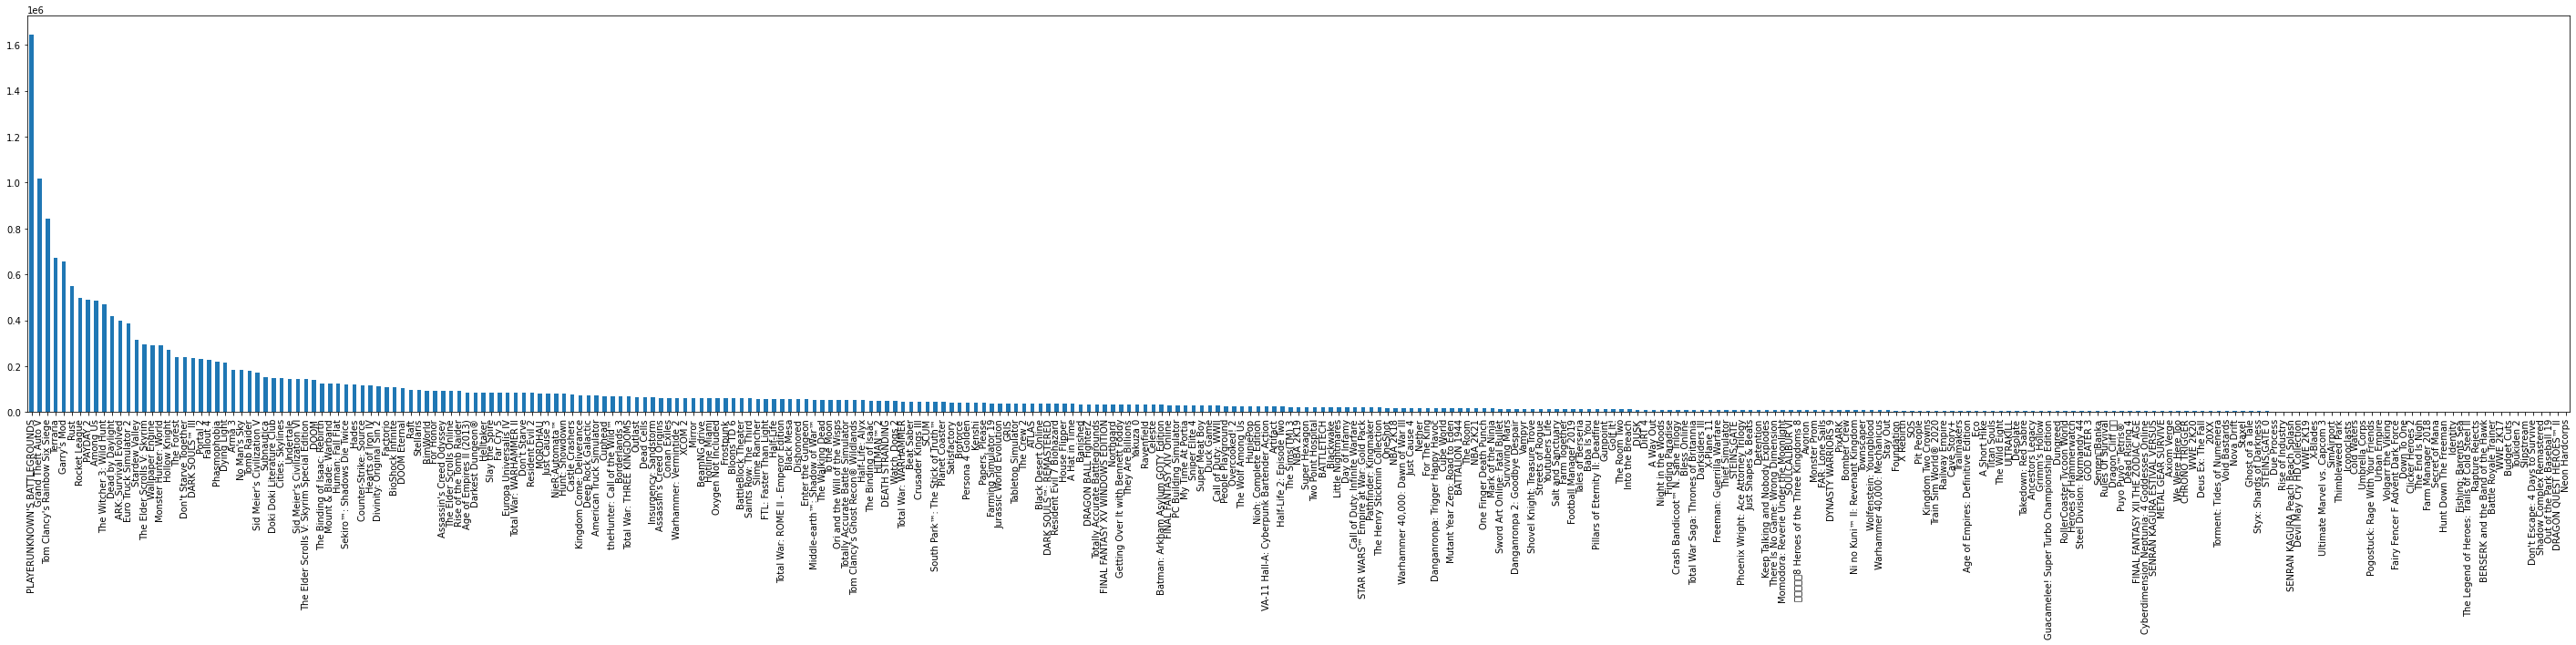

In [71]:
dataset['app_name'].value_counts().plot.bar(figsize = (50,8))

<AxesSubplot:>

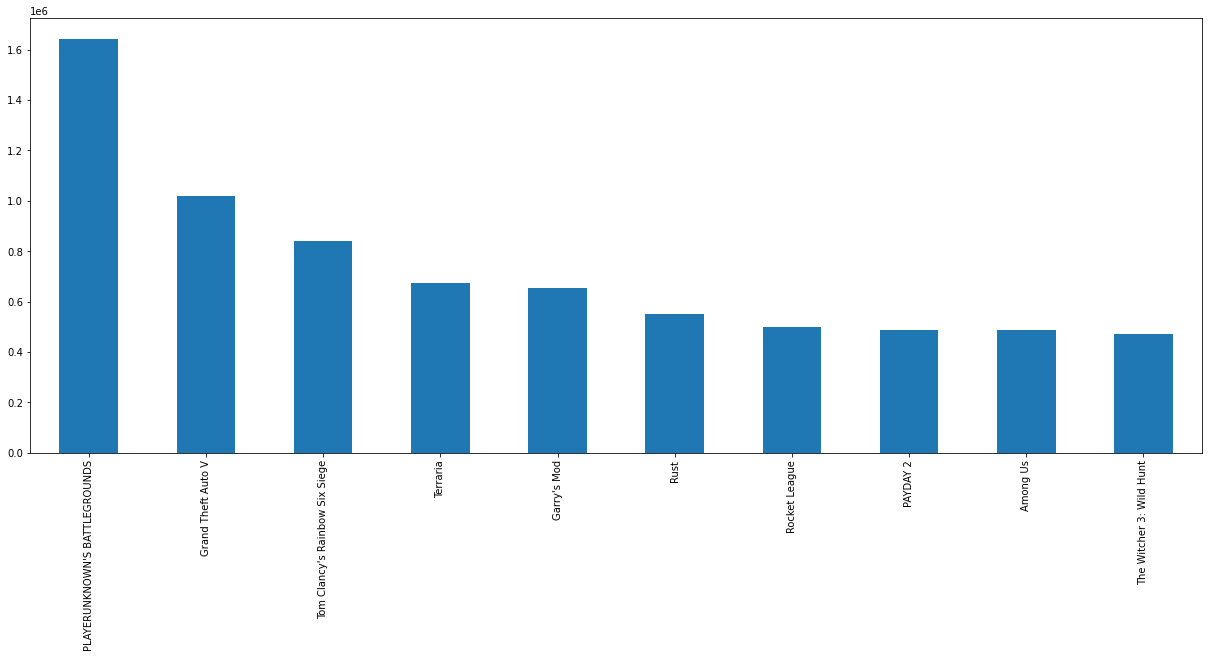

In [73]:
dataset['app_name'].value_counts()[:10].plot.bar(figsize = (21,8))

In [74]:
dataset.groupby('app_name')['weighted_vote_score'].idxmax().idxmax()

'Half-Life: Alyx'

In [75]:
dataset.groupby('app_name').recommended.sum().idxmax()

"PLAYERUNKNOWN'S BATTLEGROUNDS"

In [76]:
dataset.groupby('app_name').recommended.sum().idxmin()

'Neon Hardcorps'

In [79]:
dataset[dataset['app_name']=="PLAYERUNKNOWN'S BATTLEGROUNDS"]['received_for_free'].value_counts()

False    1582812
True       61443
Name: received_for_free, dtype: int64

In [78]:
dataset[dataset['app_name']=="Neon Hardcorps"]['received_for_free'].value_counts()

False    173
True      27
Name: received_for_free, dtype: int64

In [81]:
dataset['timestamp_created'].dt.strftime('%H:%M').value_counts()[:15].plot.bar

<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x000001D1982C02E0>>

In [43]:
time_intervals = [dt.datetime.strptime('06:00:00', '%H:%M:%S')]

In [44]:
dataset.groupby(pd.cut(dataset['timestamp_created'].dt.strftime('%H:%M:%S'), time_intervals)).count()
    

TypeError: float() argument must be a string or a number, not 'datetime.datetime'

<AxesSubplot:>

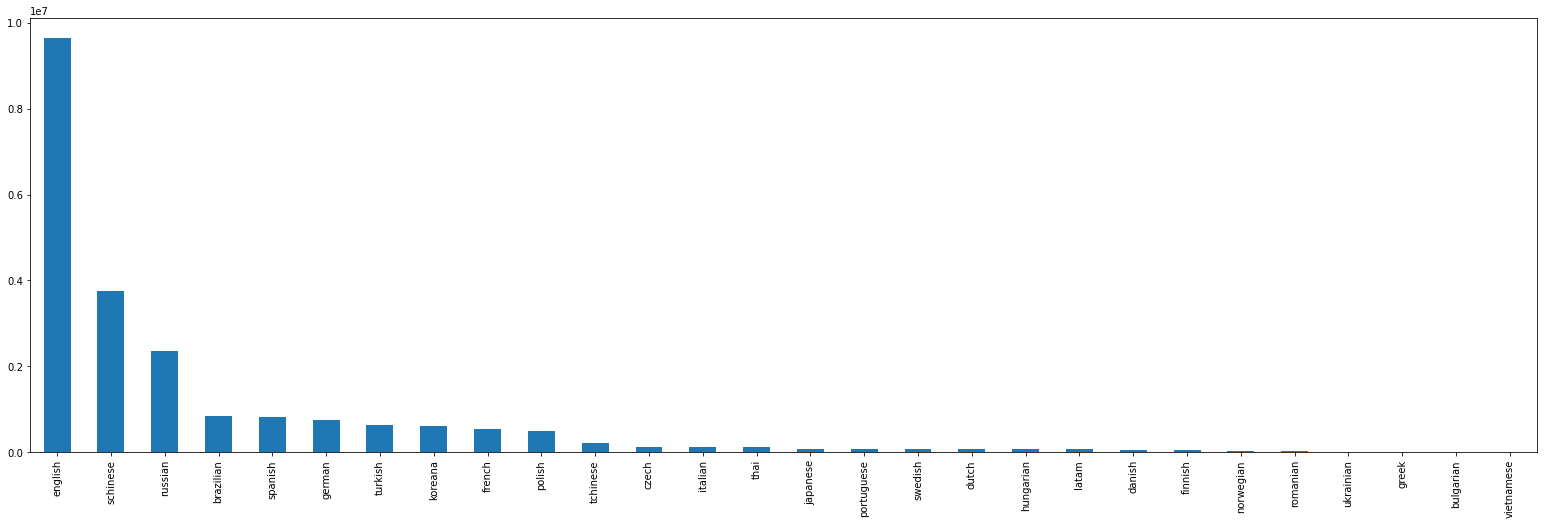

In [42]:
dataset['language'].value_counts().plot.bar(figsize = (27,8))

In [40]:
def filter_by_language(my_dataset, language_list):
    new_dataset = my_dataset[my_dataset['language'].isin(language_list)]
    return new_dataset

In [46]:
language_list = ['english', 'russian', 'schinese']
filt_ds = filter_by_language(dataset,language_list)


In [47]:
vfn= filt_ds[filt_ds['votes_funny'] != 0].shape[0] #number of reviews with a funny vote number greater than 0

vote_funny_percentage = vfn/filt_ds.shape[0]
print(vote_funny_percentage)

0.09688186971294103


In [48]:
vhn= filt_ds[filt_ds['votes_helpful'] != 0].shape[0] #number of reviews with a funny vote number greater than 0

vote_helpful_percentage = vhn/filt_ds.shape[0]
print(vote_helpful_percentage)

0.2613812537035169


<AxesSubplot:>

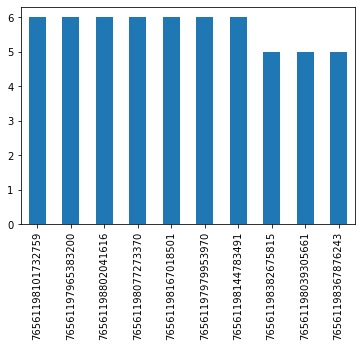

In [49]:
dataset['author.steamid'].value_counts()[:10].plot.bar()

In [50]:
dataset['author.steamid'].value_counts().idxmax()

76561198101732759

In [56]:
most_popular_reviewer = dataset[dataset['author.steamid'] == 76561198101732759]

In [57]:
most_popular_reviewer['app_name'].to_numpy()

array(['The Witcher 3: Wild Hunt', 'Half-Life', 'Counter-Strike: Source',
       'Half-Life 2: Episode Two', 'Portal 2', "Garry's Mod"],
      dtype=object)

In [58]:
most_popular_reviewer['received_for_free'].value_counts()

False    6
Name: received_for_free, dtype: int64

In [59]:
most_popular_reviewer[most_popular_reviewer['received_for_free'] == False].recommended.value_counts()

False    5
True     1
Name: recommended, dtype: int64

In [60]:
most_popular_reviewer[most_popular_reviewer['received_for_free'] == True].recommended.value_counts()

Series([], Name: recommended, dtype: int64)

In [61]:
dataset_with_updates = dataset[dataset['timestamp_updated'] != dataset['timestamp_created']]
(dataset_with_updates['timestamp_updated'] -dataset_with_updates['timestamp_created']).mean()

Timedelta('386 days 05:45:11.277674512')

<AxesSubplot:>

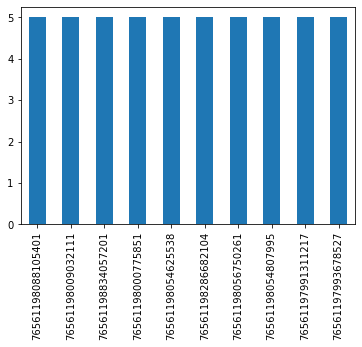

In [62]:
dataset_with_updates['author.steamid'].value_counts()[:3].plot.bar()

In [22]:
data2 = dataset[dataset['weighted_vote_score'] >= 0.5]
ncf = data2.shape[0]
nct = dataset.shape[0]

my_percentage = ncf / nct
print(my_percentage)

0.21998484322541792


In [24]:
intersect = data2[data2['votes_funny']!=0].shape[0]
final_prob = intersect / ncf
print(final_prob)

0.24914152988696706


In [26]:
numb_funny_votes = dataset[dataset['votes_funny']!=0].shape[0]
prob_funny_votes = numb_funny_votes / nct
print(prob_funny_votes)

0.1196959393390585


In [56]:
russian_data = dataset[dataset['language'] == 'russian']
schinese_data= dataset[dataset['language'] == 'schinese']

In [58]:
vector_a = russian_data[russian_data['weighted_vote_score']!=0]['weighted_vote_score'].to_numpy()
vector_b = schinese_data[schinese_data['weighted_vote_score']!=0]['weighted_vote_score'].to_numpy()

In [66]:
print(vector_a)
print(vector_b)

[0.52380955 0.52380955 0.52380955 ... 0.54732507 0.79892051 0.51815742]
[0.52380955 0.78422624 0.40145987 ... 0.33523822 0.50624514 0.41610676]


In [68]:
ttest_ind(vector_a,vector_b)

Ttest_indResult(statistic=-103.25727519235977, pvalue=0.0)

In [43]:
def language_map(x):
    return x.map({'russian': 0, 'schinese' : 1})

<ipython-input-45-62c8c677efb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['language'] = language_map(data2['language'])


In [55]:
dataset[dataset['weighted_vote_score'] != 0]['weighted_vote_score']

23          0.523810
27          0.784226
29          0.523810
33          0.401460
64          0.521739
              ...   
21747362    0.521739
21747365    0.847315
21747368    0.474138
21747369    0.386022
21747370    0.416107
Name: weighted_vote_score, Length: 6976357, dtype: float64